In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualizations
import seaborn as sns #data visualizations

In [2]:
data = pd.read_csv('data.csv',encoding='unicode_escape')

Upload data and look at the top 5

In [21]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.tail()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

We convert the 'InvoiceDate' column from object to datetime so that you can use it in subsequent calculations.

In [8]:
data_new = data.copy()

In [9]:
data_new = data_new[(data_new['UnitPrice'] > 0) & (data_new['Quantity'] > 0)]
data_new[data_new['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Discounted prices, dirty data etc. can. To get rid of this, we take orders with a price and quantity greater than 0: Here we have filtered out 'UnitPrice' to 0 for control.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


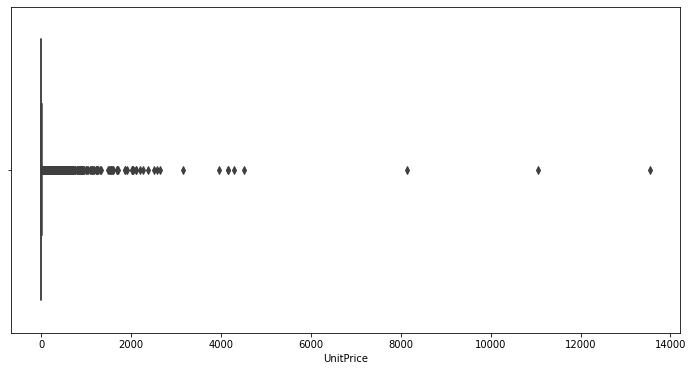

In [10]:
#That look the numeric data
plt.subplots(figsize =(12,6))
sns.boxplot(data_new.UnitPrice);

looking at dense places and ends

In [11]:
data_new.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
data_new.groupby(by=['CustomerID','Country'])['InvoiceNo'].count().head()

CustomerID  Country       
12346.0     United Kingdom      1
12347.0     Iceland           182
12348.0     Finland            31
12349.0     Italy              73
12350.0     Norway             17
Name: InvoiceNo, dtype: int64

Here is how many orders a customer places on a country basis:

In [13]:
data_new['TotalPrice']=data_new['UnitPrice'] * data_new['Quantity']
data_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


To find the total price paid for a product in an order, we multiply the columns of 'UnitPrice' and 'Quantity'.

In [14]:
data_new.groupby(by=['CustomerID'], as_index=False)['TotalPrice'].sum().head()

,CustomerID,TotalPrice
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


To find the total spend of a customer

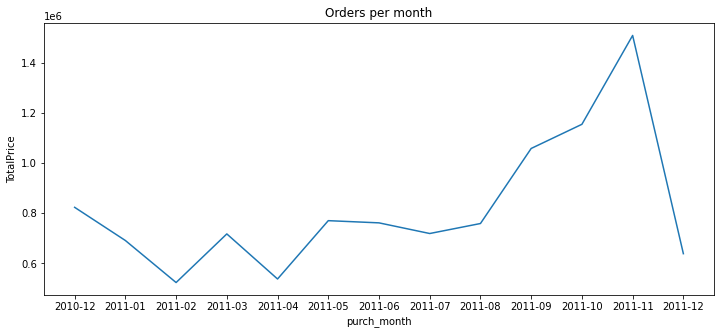

In [15]:
#Review by date
data_new['purch_month'] = data_new.InvoiceDate.dt.to_period('M').astype(str)
order_per_month = data_new.groupby(by='purch_month', as_index=False).TotalPrice.sum()
plt.figure(figsize = (12,5))
ax = sns.lineplot(x="purch_month", y = "TotalPrice", data=order_per_month)
ax.set_title('Orders per month');

Total turnover on a monthly basis
We create a year-month-based column, then visualize it:

In [16]:
data_new_2= data_new.groupby('Country')['InvoiceNo'].count().sort_values(ascending= False)

In [17]:
data_new_2.head()


Country
United Kingdom    485123
Germany             9040
France              8407
EIRE                7890
Spain               2484
Name: InvoiceNo, dtype: int64

Most orders come from the United Kingdom,

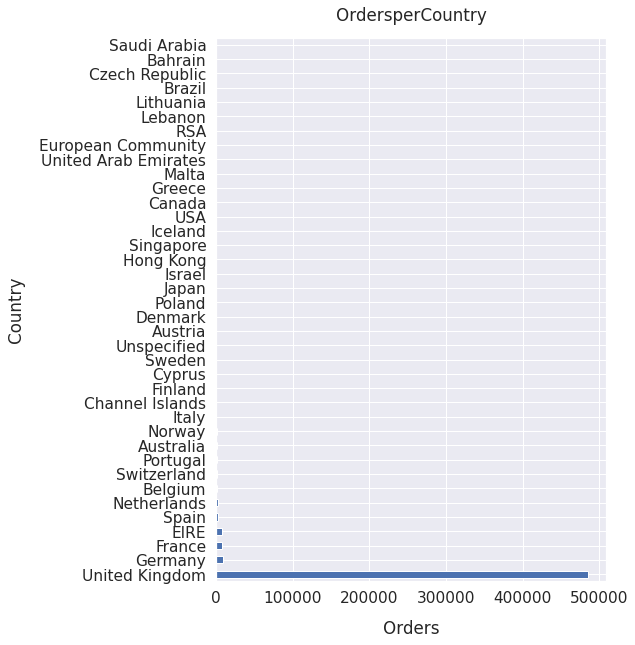

In [18]:
sns.set(font_scale=1.4)
data_new_2.plot(kind='barh', figsize=(7, 10), rot=0)
plt.xlabel("Orders", labelpad=14)
plt.ylabel("Country", labelpad=14)
plt.title("OrdersperCountry", y=1.02);

In [19]:
data_grouped =  data_new.groupby(by=['Country','purch_month'], as_index=False)['TotalPrice'].sum()
data_grouped['percentage'] = data_grouped['TotalPrice']/data_grouped['TotalPrice'].sum()
data_per =  data_grouped.groupby(by=['Country'], as_index=False)['percentage'].sum().sort_values('percentage',ascending=False)
data_per.head()

,Country,percentage
36,United Kingdom,0.846113
24,Netherlands,0.026761
10,EIRE,0.026574
14,Germany,0.021456
13,France,0.019661


We look at the share that countries receive based on their total spending.

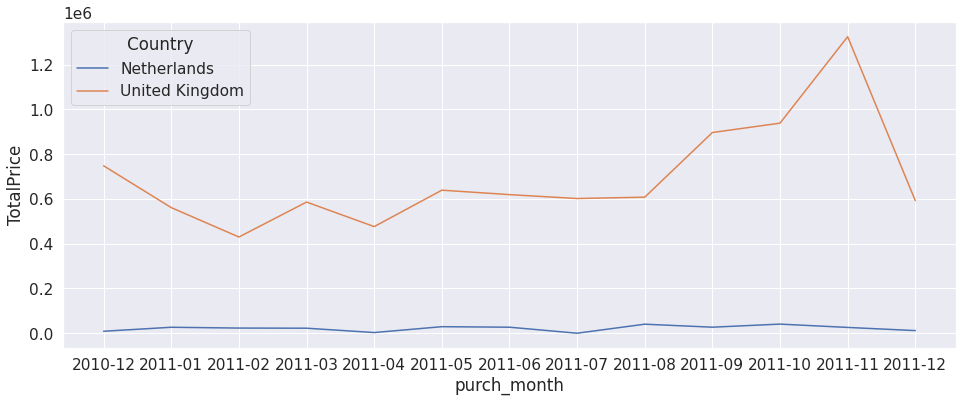

In [20]:
df = data_grouped[data_grouped['Country'].isin(['United Kingdom','Netherlands'])]
plt.figure(figsize=(16,6))
d=np.arange(1,13)
sns.lineplot(data = df, x='purch_month', y='TotalPrice',err_style='bars', hue= 'Country');


We filter the first 2 countries that have the highest share in sales and look at the train on monthly sales:

Conclusion.
           In England, the effect of 'Black Friday' or 'Halloween' is higher than the effect on sales in the Netherlands.